In [8]:
from dolo import *
from matplotlib import pyplot as plt 

In [9]:
model = yaml_import("../models/consumption_savings.yaml")

In [10]:
dr = time_iteration(model)

Solving WITH complementarities.
------------------------------------------------
| N   |  Error     | Gain     | Time     | nit |
------------------------------------------------
|   1 |  8.000e-01 |      nan |    0.194 |   5 |
|   2 |  8.027e-02 |    0.100 |    0.371 |   6 |
|   3 |  4.881e-02 |    0.608 |    0.078 |   4 |
|   4 |  3.369e-02 |    0.690 |    0.092 |   5 |
|   5 |  2.470e-02 |    0.733 |    0.110 |   4 |
|   6 |  1.938e-02 |    0.785 |    0.085 |   5 |
|   7 |  1.541e-02 |    0.795 |    0.097 |   5 |
|   8 |  1.223e-02 |    0.794 |    0.111 |   4 |
|   9 |  9.744e-03 |    0.797 |    0.091 |   4 |
|  10 |  7.958e-03 |    0.817 |    0.106 |   4 |
|  11 |  6.347e-03 |    0.798 |    0.097 |   4 |
|  12 |  5.251e-03 |    0.827 |    0.090 |   4 |
|  13 |  5.288e-03 |    1.007 |    0.099 |   5 |
|  14 |  5.270e-03 |    0.997 |    0.112 |   5 |
|  15 |  5.295e-03 |    1.005 |    0.129 |   5 |
|  16 |  5.280e-03 |    0.997 |    0.167 |   5 |
|  17 |  5.154e-03 |    0.976 |    0.

One can also try the faster version

## Stochastic Simulations

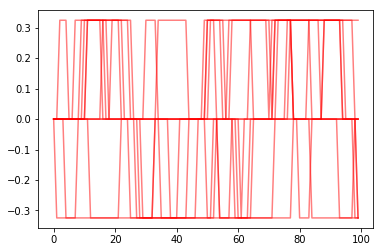

In [11]:
# Shocks are discretized as a markov chain by default:
dp = model.exogenous.discretize()
sim_shock = dp.simulate(10, 100, i0=1)
for i in range(10):
    plt.plot(sim_shock[:,i,0], color='red', alpha=0.5)

In [116]:
sim = simulate(model, dr, i0=1, N=100)

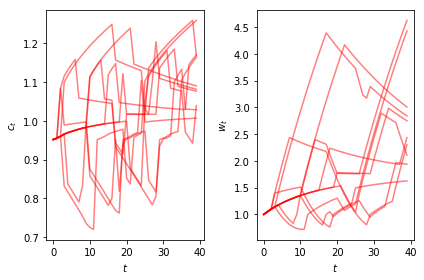

In [117]:
plt.subplot(121)
for i in range(10):
    plt.plot(sim.sel(N=i,V='c'), color='red', alpha=0.5)
plt.ylabel("$c_t$")
plt.xlabel("$t$")
plt.subplot(122)
for i in range(10):
    plt.plot(sim.sel(N=i,V='w'), color='red', alpha=0.5)
plt.xlabel("$t$")
plt.ylabel("$w_t$")

plt.tight_layout()

## Ergodic distribution

In [118]:
sim_long = simulate(model, dr, i0=1, N=1000, T=200)

    Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Text(0.5, 0, '$w$')

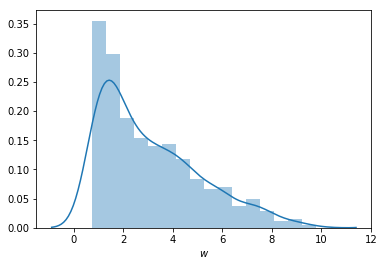

In [119]:
import seaborn
seaborn.distplot(sim_long.sel(T=199, V='w'))
plt.xlabel("$w$")

## Plotting Decision Rule

In [120]:
tab = tabulate(model, dr,'w')

In [121]:
from matplotlib import pyplot as plt

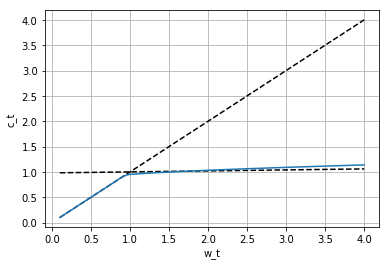

In [122]:
stable_wealth = model.eval_formula('1/r+(1-1/r)*w(0)', tab)
plt.plot(tab['w'], tab['w'],color='black', linestyle='--')
plt.plot(tab['w'], stable_wealth,color='black', linestyle='--')
plt.plot(tab['w'], tab['c'])
plt.xlabel("w_t")
plt.ylabel("c_t")
plt.grid()